# Assignment4_Lahore_AQI_Deployment.ipynb

## Lahore Air Quality Model Deployment and Feedback

**Student:** Muhammad Owais       
**Reg ID** 225194     
**Instructor:** Ghulam Ali      
**Class:** BSCS-F22   
**Course:** Data Science  



**Date:** December 20, 2025



In [ ]:
!pip install -q streamlit pyngrok statsmodels pandas matplotlib joblib

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import streamlit as st
import pandas as pd
import pickle
from statsmodels.tsa.arima.model import ARIMAResults
import matplotlib.pyplot as plt
import warnings
import joblib
import os
warnings.filterwarnings('ignore')


@st.cache_resource
def load_model():
    models = joblib.load('trained_models.pkl')
    return models['arima_model']  #

model = load_model()


@st.cache_data
def load_data():
    df = pd.read_csv('df_final.csv', parse_dates=['date'])
    df = df.sort_values('date').set_index('date')
    return df

df = load_data()


def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good", "Air quality is excellent for travel to Lahore. Enjoy your trip!"
    elif aqi <= 100:
        return "Moderate", "Air quality is acceptable for travel, but sensitive individuals should take precautions."
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups", "Not ideal for travel if you have respiratory issues; others should limit outdoor activities."
    elif aqi <= 200:
        return "Unhealthy", "Poor air quality; reconsider travel or wear masks and limit exposure."
    elif aqi <= 300:
        return "Very Unhealthy", "Very poor air quality; avoid travel to Lahore if possible."
    else:
        return "Hazardous", "Extremely hazardous air quality; strongly advise against traveling to Lahore."


st.title('Lahore Air Quality Predictor')


st.sidebar.header('Forecast Settings')
forecast_steps = st.sidebar.slider('Forecast Days', min_value=1, max_value=90, value=30)

st.header('AQI Forecast Tool')
st.write("""
This app uses a pre-trained ARIMA model from Assignment 3 to forecast Lahore's AQI based on historical data (2019-2023).
Click below to generate the forecast.
""")

forecast = None
conf_int = None
if st.button('Generate Forecast'):
    try:

        forecast = model.forecast(steps=forecast_steps)

        st.subheader(f'{forecast_steps}-Day AQI Forecast')
        st.write(f'Average Forecasted AQI: {forecast.mean():.2f}')
        st.write(f'Min Forecasted AQI: {forecast.min():.2f}')
        st.write(f'Max Forecasted AQI: {forecast.max():.2f}')


        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(range(forecast_steps), forecast, marker='o', color='blue', label='Forecasted AQI')
        ax.set_title('Forecasted AQI Over Time')
        ax.set_xlabel('Days Ahead')
        ax.set_ylabel('AQI Value')
        ax.legend()
        ax.grid(True)
        st.pyplot(fig)


        conf_int = model.get_forecast(steps=forecast_steps).conf_int()
        st.subheader('Forecast Confidence Intervals')
        st.dataframe(conf_int.head(10))


        avg_aqi = forecast.mean()
        category, advice = get_aqi_category(avg_aqi)
        st.subheader('Travel Advice for Lahore')
        st.write(f"AQI Category: **{category}** (Average AQI: {avg_aqi:.2f})")
        st.write(advice)

    except Exception as e:
        st.error(f"Error generating forecast: {str(e)}")
        st.write("Ensure 'trained_models.pkl' and 'df_final.csv' are uploaded to Colab.")


st.subheader('Recent Historical Data')
st.dataframe(df.tail(10)[['aqi_pm2.5', 'avg_temp_f', 'avg_humidity_percent', 'avg_wind_speed_mph']])


if forecast is not None:
    st.header('Feedback on Prediction')
    st.write("Please provide your feedback on the generated prediction.")

    with st.form(key='feedback_form'):
        usability = st.slider('Usability Rating (1-5)', min_value=1, max_value=5, value=3)
        accuracy = st.slider('Prediction Accuracy Rating (1-5)', min_value=1, max_value=5, value=3)
        prediction_feedback = st.text_area('Feedback on the Specific Prediction (e.g., does it seem realistic?)')
        suggestions = st.text_area('General Suggestions for Improvement')
        submit_button = st.form_submit_button(label='Submit Feedback')

        if submit_button:

            feedback_data = {
                'Usability': [usability],
                'Accuracy': [accuracy],
                'Prediction_Feedback': [prediction_feedback],
                'Suggestions': [suggestions],
                'Forecast_Steps': [forecast_steps],
                'Avg_Forecast_AQI': [forecast.mean() if forecast is not None else None]
            }
            feedback_df = pd.DataFrame(feedback_data)


            file_path = 'user_feedback.csv'
            if os.path.exists(file_path):
                existing_df = pd.read_csv(file_path)
                feedback_df = pd.concat([existing_df, feedback_df], ignore_index=True)

            feedback_df.to_csv(file_path, index=False)
            st.success('Thank you for your feedback! It has been saved.')



2025-12-20 14:22:47.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:47.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:47.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:47.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:48.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:48.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:48.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 14:22:48.289 No runtime found, using MemoryCacheStorageManager
2025-12-20 14:22:48.292 No runtime found, us

In [ ]:
!pkill streamlit


In [ ]:
!pip install -q pyngrok


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("376sn4mfm22wncSmvRUnCeSfUBv_6CSUbNWEBqAnC7kZgZHRZ")


In [ ]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &





  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

  Stopping...


In [ ]:
from pyngrok import ngrok

!streamlit run app.py &>/dev/null&

public_url = ngrok.connect(8501)
print("🚀 App running at:", public_url)


🚀 App running at: NgrokTunnel: "https://lifelong-hortense-urethritic.ngrok-free.dev" -> "http://localhost:8501"


(np.float64(-0.5), np.float64(1908.5), np.float64(858.5), np.float64(-0.5))

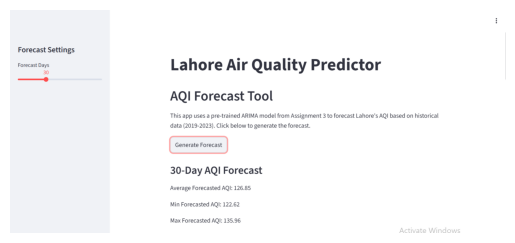

In [ ]:
img = Image.open('Predictor.png')

plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(1370.5), np.float64(749.5), np.float64(-0.5))

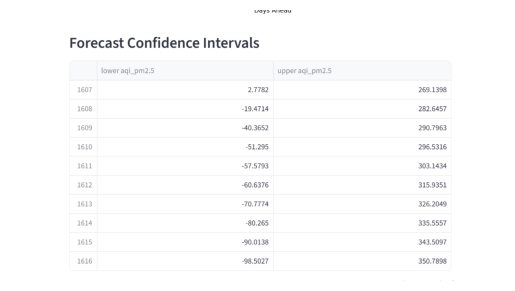

In [ ]:

img = Image.open('new.png')

plt.imshow(img)
plt.axis('off')